In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
from scipy import signal as sig
from control import margin
import os
import control
import math

In [2]:
def step(t):
    return 1 + t*0
def ramp(t):
    return t
def parabola(t):
    return t**2

In [3]:
# num = np.array([0,0,10**3])
# den = np.array([1,20,10])

# sys = control.tf(num,den)
# sys

In [4]:
num = np.array([0,0,40])
den = np.array([1,2,0])

sys = control.tf(num,den)
sys


    40
---------
s^2 + 2 s

C:\Users\Braydon\Anaconda3\lib\site-packages\scipy\signal\filter_design.py:1452: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


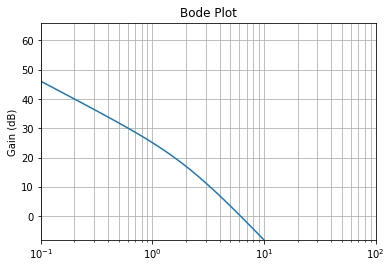

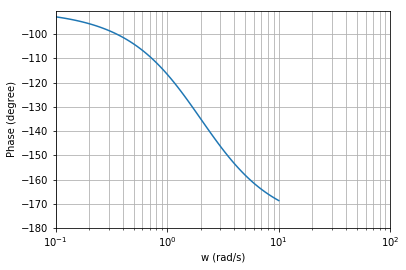

Phase Margin:17.964236 degrees at 6.168466 rad/sec
Gain Margin:inf dB at nan rad/sec


In [5]:
system = sig.lti(num,den)

w, magnitude, phase = sig.bode(system)
gm, pm, wg, wp = margin(control.tf(num,den))


plt.figure()
plt.title("Bode Plot")
plt.semilogx(w,magnitude)
plt.grid(which="both")
plt.ylabel("Gain (dB)")
plt.axis([10**(-1),10**(2),min(magnitude),max(magnitude)])
# plt.axis([20,30,-10,10])
plt.figure()
plt.semilogx(w,phase)
plt.grid(which="both")
plt.ylabel("Phase (degree)")
plt.xlabel("w (rad/s)")
plt.axis([10**(-1),10**(2),-180,max(phase)])
plt.show()

print("Phase Margin:%f degrees at %f rad/sec" %(pm,wp))
print("Gain Margin:%f dB at %f rad/sec" %(20*np.log10(gm),wg))

In [6]:
den = den + num #Redefine denominator for closed loop response.
sys = control.TransferFunction(num,den)

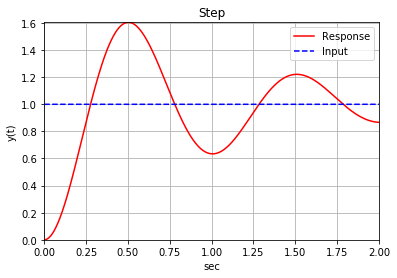

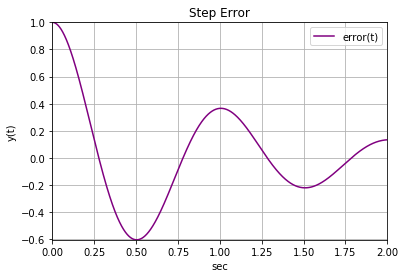

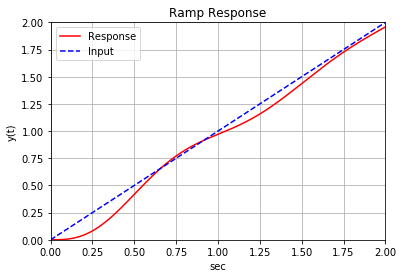

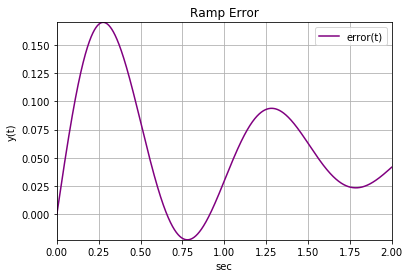

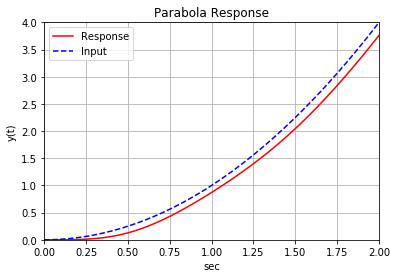

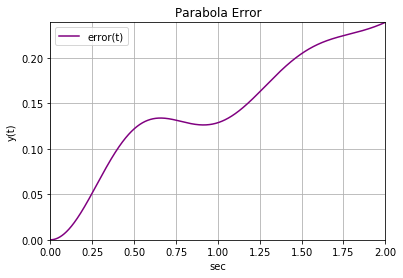

In [7]:
t = np.linspace(0,2,10000)



t, y, x = control.forced_response(sys, t, step(t), 0)

plt.plot(t,y,'r',label='Response')
plt.plot(t,(step(t)),'b--',label='Input')
plt.axis([0,2,min(y),max(y)])
plt.grid()
plt.title('Step')
plt.xlabel('sec')
plt.ylabel('y(t)')
plt.legend()
plt.show()

#plot step error
plt.plot(t,(step(t)-y),'purple',label='error(t)')
plt.axis([0,2,min(step(t)-y),max(step(t)-y)])
plt.grid()
plt.title('Step Error')
plt.xlabel('sec')
plt.ylabel('y(t)')
plt.legend()
plt.show()



#Plot Ramp Response
t, y, x = control.forced_response(sys, t, ramp(t), 0)
plt.plot(t,y,'r',label='Response')
plt.plot(t,(ramp(t)),'b--',label='Input')
plt.axis([0,2,min(y),max(ramp(t))])
plt.grid()
plt.title('Ramp Response')
plt.xlabel('sec')
plt.ylabel('y(t)')
plt.legend()
plt.show()

#Plot Ramp Error
plt.plot(t,(ramp(t)-y),'purple',label='error(t)')
plt.axis([0,2,min(ramp(t)-y),max(ramp(t)-y)])
plt.grid()
plt.title('Ramp Error')
plt.xlabel('sec')
plt.ylabel('y(t)')
plt.legend()
plt.show()



#Plot Parabola Response
t, y, x = control.forced_response(sys, t, parabola(t), 0)
plt.plot(t,y,'r',label='Response')
plt.plot(t,(parabola(t)),'b--',label='Input')
plt.axis([0,2,min(y),max(parabola(t))])
plt.grid()
plt.title('Parabola Response')
plt.xlabel('sec')
plt.ylabel('y(t)')
plt.legend()
plt.show()
#Plot Parabola Error
plt.plot(t,(parabola(t)-y),'purple',label='error(t)')
plt.axis([0,2,min(parabola(t)-y),max(parabola(t)-y)])
plt.grid()
plt.title('Parabola Error')
plt.xlabel('sec')
plt.ylabel('y(t)')
plt.legend()
plt.show()




We need to add about 30 degrees to the system.

In [8]:
a = (1 + np.sin(30*np.pi/180))/(1-np.sin(30*np.pi/180))
a

3.0

In [9]:
b = -10*np.log(a)/np.log(10)
b

-4.7712125471966242

In [10]:
# plt.figure()
# plt.title("Bode Plot")
# plt.semilogx(w,magnitude)
# plt.grid(which="both")
# plt.ylabel("Gain (dB)")
# plt.axis([28,40,-2,0])
# plt.show()

It looks like the uncompensated network is at -1.76 db at w = 33 rad/sec.

In [11]:
w_m = 8.4

In [12]:
w_p = math.sqrt(a)*w_m
w_p

14.549226783578568

In [13]:
w_z = w_m/math.sqrt(a)
w_z


4.849742261192857

In [14]:
# num = np.array([0,0,10**3])
# den = np.array([1,20,10])

# sys = control.tf(num,den)
# sys

In [15]:
num = np.array([0,0,40])
den = np.array([1,2,0])

sys = control.tf(num,den)
sys


    40
---------
s^2 + 2 s

In [16]:
Gnum = w_p*np.array([0,1,w_z])
Gden = w_z*np.array([0,1,w_p])
print(Gnum)
print(Gden)

[  0.          14.54922678  70.56      ]
[  0.           4.84974226  70.56      ]


In [17]:
# system = sig.lti(Gnum,Gden)

# w, magnitude, phase = sig.bode(system)
# gm, pm, wg, wp = margin(control.tf(Gnum,Gden))


# plt.figure()
# plt.title("Bode Plot")
# plt.semilogx(w,magnitude)
# plt.grid(which="both")
# plt.ylabel("Gain (dB)")
# plt.axis([10**(-1),10**(2),min(magnitude),max(magnitude)])
# # plt.axis([20,30,-10,10])
# plt.figure()
# plt.semilogx(w,phase)
# plt.grid(which="both")
# plt.ylabel("Phase (degree)")
# plt.xlabel("w (rad/s)")
# plt.axis([10**(-1),10**(2),-180,max(phase)])
# plt.show()

# print("Phase Margin:%f degrees at %f rad/sec" %(pm,wp))
# print("Gain Margin:%f dB at %f rad/sec" %(20*np.log10(gm),wg))

In [18]:
num = sig.convolve(Gnum,num)
den = sig.convolve(Gden,den)

sys = control.tf(num,den)
sys


         582 s + 2822
------------------------------
4.85 s^3 + 80.26 s^2 + 141.1 s

C:\Users\Braydon\Anaconda3\lib\site-packages\scipy\signal\filter_design.py:1452: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


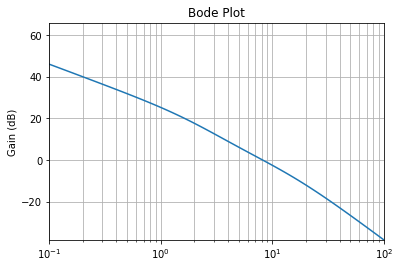

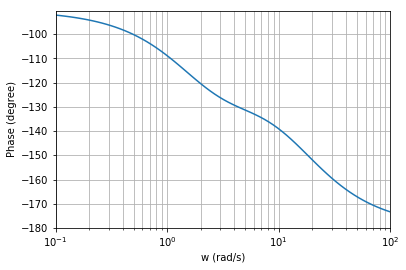

Phase Margin:43.795519 degrees at 8.137632 rad/sec
Gain Margin:inf dB at nan rad/sec


In [19]:
system = sig.lti(num,den)

w, magnitude, phase = sig.bode(system)
gm, pm, wg, wp = margin(control.tf(num,den))


plt.figure()
plt.title("Bode Plot")
plt.semilogx(w,magnitude)
plt.grid(which="both")
plt.ylabel("Gain (dB)")
plt.axis([10**(-1),10**(2),min(magnitude),max(magnitude)])
# plt.axis([20,30,-10,10])
plt.figure()
plt.semilogx(w,phase)
plt.grid(which="both")
plt.ylabel("Phase (degree)")
plt.xlabel("w (rad/s)")
plt.axis([10**(-1),10**(2),-180,max(phase)])
plt.show()

print("Phase Margin:%f degrees at %f rad/sec" %(pm,wp))
print("Gain Margin:%f dB at %f rad/sec" %(20*np.log10(gm),wg))